## 1.1 Introduction

The purpose of this project is to develop a predictive model which estimates household energy usage based on factors such as household occupancy, location, and structural features. This step focuses on collecting data, organizing it, and making sure it's well defined.

Per the U.S. Energy Information Administration, 52% of household energy consumption is used for space heating and air conditioning. It should be noted, heating and air conditioning usage vary significantly based on location, home size and structure, and equpment and fuels used. 25% of household energy usage consists of water heating, lighting, and refrigeration (i.e. year round energy use). The remaining 23% consists of devices such as televisions, cooking appliances, washer and dryers, and consumer electronics (i.e. computers, smart phones, video game consoles, streaming devices, etc.).

Therefore, this project is focused on the household energy consumption of space heating and air conditioning and the estimated usage of large appliances.

## 1.2 Objectives

Develop a linear regression model to predict the house hold energy consumption of a home. 

## 1.3 Imports 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 1.4 Load Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 759 entries, DOEID to ZLPAMOUNT
dtypes: float64(262), int64(493), object(4)
memory usage: 32.9+ MB
(5686, 759)
energy_usage_data:   (4382, 38)
housing_footage_data:   (4382, 122)
['Year Survey Conducted', '4-digit identification number', 'Census Region', 'Census Division', 'Four Largest States', 'Type of Home  (Respondent answer)', 'Mail Questionnaire Codes', 'The Final Weight', 'Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'Structure originally built as single-family house', 'More like a single-family house or an apartment', "Worry that you wouldn't be able to pay energy bill", 'Reduce basic household expenses', 'Need to borrow to pay energy bill', 'Skip or pay less than whole energy bill', 'Ever been threatened with energy cut off', 'Close off part of home to save energy', 'Keep temperature at an unsafe/unhealthy level', 'Leave home because it w

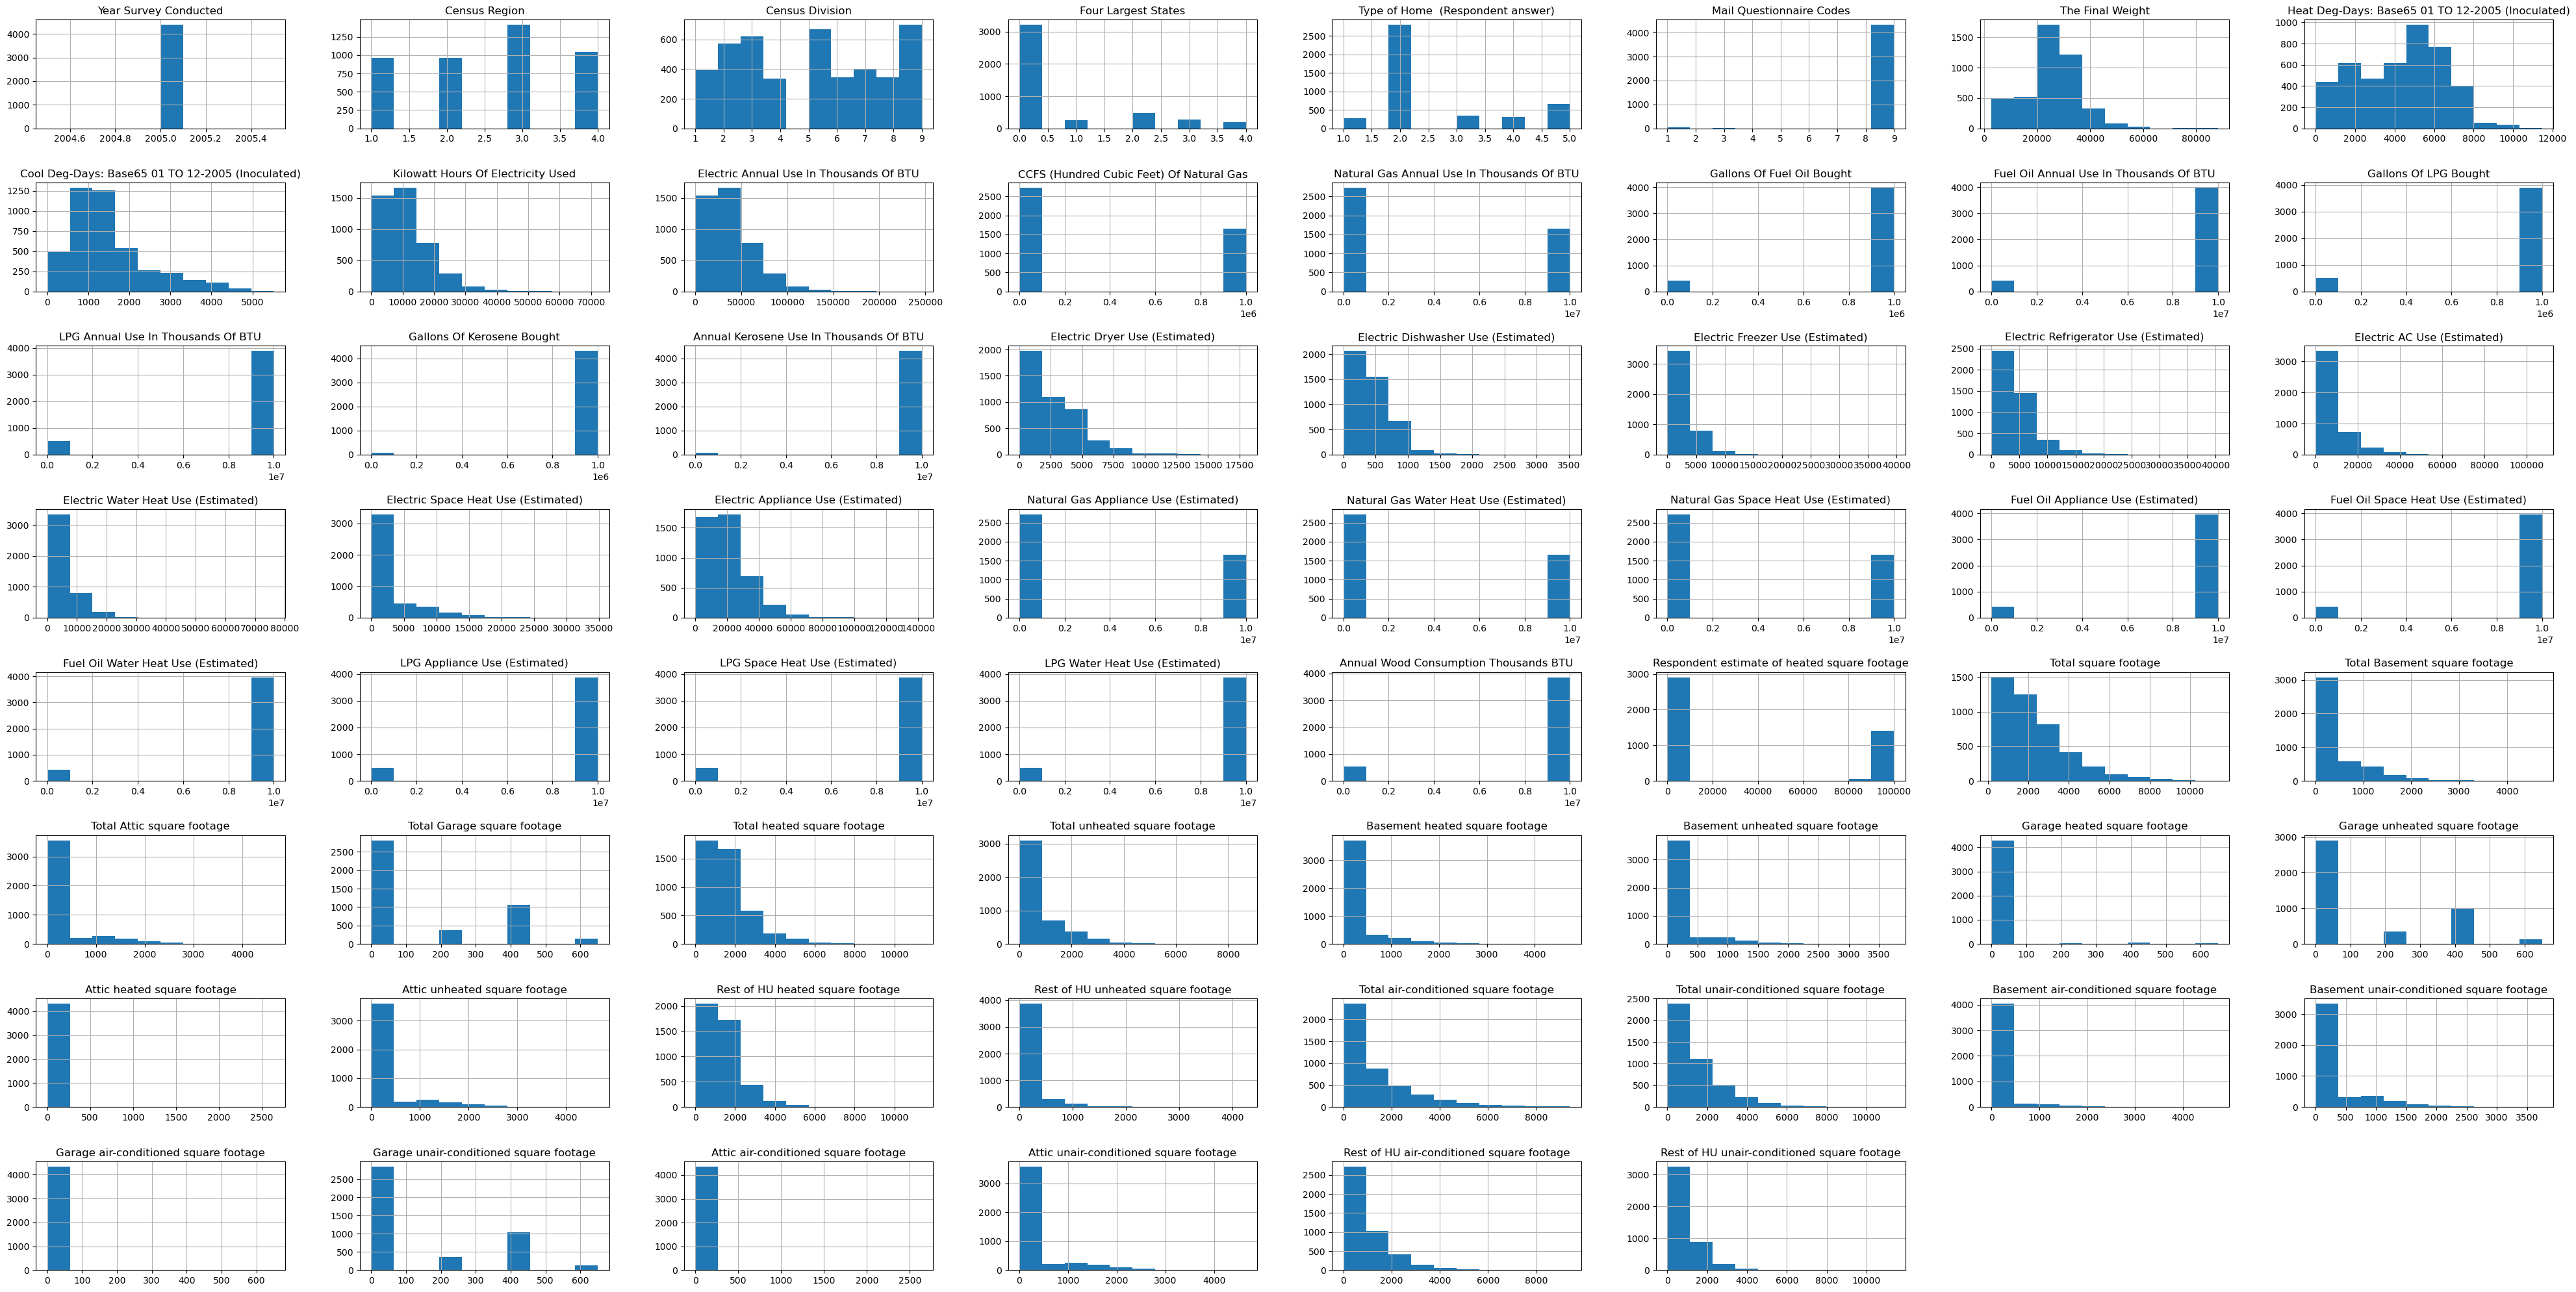

Index(['Total Attic square footage', 'Attic heated square footage',
       'Attic unheated square footage', 'Attic air-conditioned square footage',
       'Attic unair-conditioned square footage'],
      dtype='object')
Empty DataFrame
Columns: [Total Attic square footage, Attic heated square footage, Attic unheated square footage]
Index: []
Index(['Total Basement square footage', 'Basement heated square footage',
       'Basement unheated square footage',
       'Basement air-conditioned square footage',
       'Basement unair-conditioned square footage'],
      dtype='object')
Index(['Total Garage square footage', 'Garage heated square footage',
       'Garage unheated square footage',
       'Garage air-conditioned square footage',
       'Garage unair-conditioned square footage'],
      dtype='object')
Index(['Respondent estimate of heated square footage',
       'Total heated square footage', 'Total unheated square footage',
       'Basement heated square footage', 'Basement unhea

In [8]:
%run 02_data_wrangling_10.19.24.ipynb

## 1.5 Explore Data

In [10]:
df.head()

,Year Survey Conducted,Census Region,Census Division,Four Largest States,Type of Home (Respondent answer),Mail Questionnaire Codes,The Final Weight,Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated),Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated),Kilowatt Hours Of Electricity Used,...,Total air-conditioned square footage,Total unair-conditioned square footage,Basement air-conditioned square footage,Basement unair-conditioned square footage,Garage air-conditioned square footage,Garage unair-conditioned square footage,Attic air-conditioned square footage,Attic unair-conditioned square footage,Rest of HU air-conditioned square footage,Rest of HU unair-conditioned square footage
4-digit identification number,,,,,,,,,,,,,,,,,,,,,
1,2005,3,7,3,2,9,25677.965247,1231,3281,13459,...,1739,250,0,0,0,250,0,0,1739,0
2,2005,4,9,2,2,1,24261.810262,1663,1123,13051,...,1320,660,0,0,0,0,0,660,660,0
3,2005,2,3,0,2,9,31806.295016,5221,1286,19464,...,2675,1189,0,789,0,400,0,0,1886,0
4,2005,4,9,0,3,9,22345.397491,5261,667,28635,...,0,899,0,0,0,0,0,0,0,899
5,2005,3,6,0,2,9,18842.455420,4392,1238,28658,...,1776,844,0,0,0,400,0,444,1332,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4370 entries, 1 to 4382
Data columns (total 62 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year Survey Conducted                             4370 non-null   int64  
 1   Census Region                                     4370 non-null   int64  
 2   Census Division                                   4370 non-null   int64  
 3   Four Largest States                               4370 non-null   int64  
 4   Type of Home  (Respondent answer)                 4370 non-null   int64  
 5   Mail Questionnaire Codes                          4370 non-null   int64  
 6   The Final Weight                                  4370 non-null   float64
 7   Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)  4370 non-null   int64  
 8   Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)  4370 non-null   int64  
 9   Kilowatt Hours Of Electr

In [12]:
df.describe()

,Year Survey Conducted,Census Region,Census Division,Four Largest States,Type of Home (Respondent answer),Mail Questionnaire Codes,The Final Weight,Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated),Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated),Kilowatt Hours Of Electricity Used,...,Total air-conditioned square footage,Total unair-conditioned square footage,Basement air-conditioned square footage,Basement unair-conditioned square footage,Garage air-conditioned square footage,Garage unair-conditioned square footage,Attic air-conditioned square footage,Attic unair-conditioned square footage,Rest of HU air-conditioned square footage,Rest of HU unair-conditioned square footage
count,4370.0,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,...,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000
mean,2005.0,2.579405,5.025400,0.624943,2.602059,8.900229,25358.423097,4307.872082,1487.698627,11241.004119,...,1337.673684,1354.326773,95.417162,257.672998,3.707094,135.011442,7.101373,255.887872,820.796110,705.758124
std,0.0,1.077342,2.637745,1.151619,1.185186,0.859626,10437.189721,2182.015696,966.876412,7309.645124,...,1530.168450,1333.863831,359.948932,514.193061,40.791957,193.947824,104.149065,596.622182,1039.978796,874.431015
min,2005.0,1.000000,1.000000,0.000000,1.000000,1.000000,2758.837595,0.000000,0.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.0,2.000000,3.000000,0.000000,2.000000,9.000000,20428.682535,2377.250000,837.250000,5791.000000,...,221.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.0,3.000000,5.000000,0.000000,2.000000,9.000000,26075.671341,4636.000000,1283.000000,9418.000000,...,832.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,484.000000,535.500000
75%,2005.0,3.000000,7.000000,1.000000,3.000000,9.000000,31025.725401,5922.000000,1858.000000,15116.750000,...,1940.000000,1978.000000,0.000000,244.250000,0.000000,400.000000,0.000000,0.000000,1377.750000,1166.750000
max,2005.0,4.000000,9.000000,4.000000,5.000000,9.000000,88235.923731,11465.000000,5518.000000,63190.000000,...,9406.000000,11383.000000,4736.000000,3750.000000,650.000000,650.000000,2640.000000,4651.000000,9400.000000,11383.000000


## 2.1 Choose Dependent Variable 

The purpose of this project is to develop a predictive model which estimates household energy usage. Therefore, the dependent variables desicribe the energy uses of the house hold - Electricity, Natural Gas, Fuel, LPG, Kerosene, and Wood usage.  

In [15]:
dep_variables = ['Kilowatt Hours Of Electricity Used', 'Electric Annual Use In Thousands Of BTU' , 'CCFS (Hundred Cubic Feet) Of Natural Gas',
                 'Natural Gas Annual Use In Thousands Of BTU', 'Gallons Of Fuel Oil Bought', 'Fuel Oil Annual Use In Thousands Of BTU', 
                 'Gallons Of LPG Bought', 'LPG Annual Use In Thousands Of BTU', 'Gallons Of Kerosene Bought', 'Annual Kerosene Use In Thousands Of BTU',
                 'Annual Wood Consumption Thousands BTU'] 

In [16]:
df[dep_variables].describe()

,Kilowatt Hours Of Electricity Used,Electric Annual Use In Thousands Of BTU,CCFS (Hundred Cubic Feet) Of Natural Gas,Natural Gas Annual Use In Thousands Of BTU,Gallons Of Fuel Oil Bought,Fuel Oil Annual Use In Thousands Of BTU,Gallons Of LPG Bought,LPG Annual Use In Thousands Of BTU,Gallons Of Kerosene Bought,Annual Kerosene Use In Thousands Of BTU,Annual Wood Consumption Thousands BTU
count,4370.000000,4370.000000,4370.000000,4.370000e+03,4370.000000,4.370000e+03,4370.000000,4.370000e+03,4370.000000,4.370000e+03,4.370000e+03
mean,11241.004119,38354.318764,378919.702746,3.829183e+06,905564.347368,9.065080e+06,886549.146911,8.869662e+06,983524.222654,9.835398e+06,8.811576e+06
std,7309.645124,24940.533129,484729.824419,4.816243e+06,292340.589206,2.894268e+06,317097.370628,3.159365e+06,127302.287909,1.271887e+06,3.230583e+06
min,48.000000,164.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,5.000000e+03
25%,5791.000000,19758.250000,521.000000,5.361100e+04,999999.000000,9.999999e+06,999999.000000,9.999999e+06,999999.000000,9.999999e+06,9.999999e+06
50%,9418.000000,32134.000000,1013.500000,1.042815e+05,999999.000000,9.999999e+06,999999.000000,9.999999e+06,999999.000000,9.999999e+06,9.999999e+06
75%,15116.750000,51578.250000,999999.000000,9.999999e+06,999999.000000,9.999999e+06,999999.000000,9.999999e+06,999999.000000,9.999999e+06,9.999999e+06
max,63190.000000,215604.000000,999999.000000,9.999999e+06,999999.000000,9.999999e+06,999999.000000,9.999999e+06,999999.000000,9.999999e+06,9.999999e+06


[None, None, None, None, None, None, None, None, None, None, None, None]

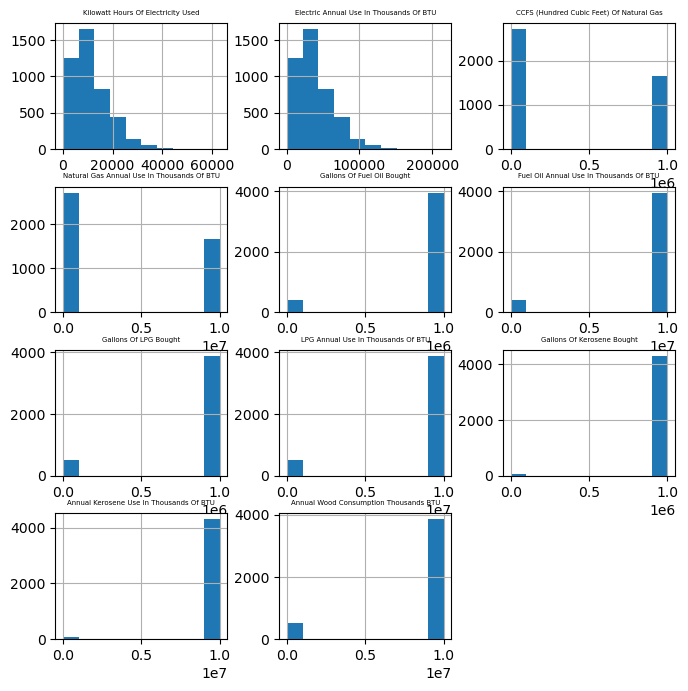

In [17]:
# Make a historgram of the dependent variables
fig = df[dep_variables].hist(figsize = (8,8))
[x.title.set_size(5) for x in fig.ravel()]

Due to the low veriablity and high standard of deviation, the prompt was revised to develop a predictive model to estimate household electricity useage.

In [19]:
electricity = ['Kilowatt Hours Of Electricity Used']

[None]

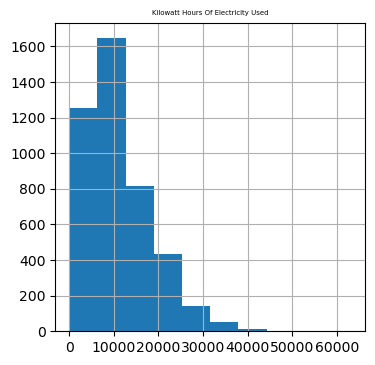

In [20]:
fig = df[electricity].hist(figsize = (4,4))
[x.title.set_size(5) for x in fig.ravel()]

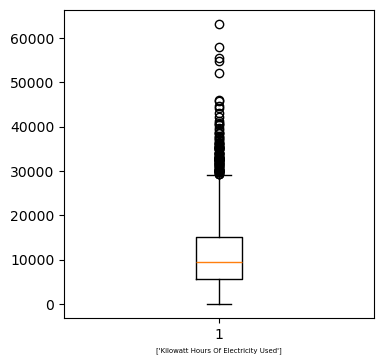

In [21]:
plt.figure(figsize=(4,4))
plt.boxplot(df[electricity])
plt.xlabel(electricity, fontsize = 5)
plt.show()

Because this is only explore electricity usage, the appliances which use other sources of energy have been removed from the database. 

Note, several of the columns within the data base are estimates of engery use. Upon further inspection of the data collection, these values were developed based on questionairs regarding number, size, model/features, energy efficiency rating, and usage of the given appliance. Because these values are estimates, they are moved from the dataframe. 

In [24]:
columns_to_drop = [col for col in df.columns if 'Estimated' in col]
df = df.drop(columns=columns_to_drop)

In [25]:
df.head()

,Year Survey Conducted,Census Region,Census Division,Four Largest States,Type of Home (Respondent answer),Mail Questionnaire Codes,The Final Weight,Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated),Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated),Kilowatt Hours Of Electricity Used,...,Total air-conditioned square footage,Total unair-conditioned square footage,Basement air-conditioned square footage,Basement unair-conditioned square footage,Garage air-conditioned square footage,Garage unair-conditioned square footage,Attic air-conditioned square footage,Attic unair-conditioned square footage,Rest of HU air-conditioned square footage,Rest of HU unair-conditioned square footage
4-digit identification number,,,,,,,,,,,,,,,,,,,,,
1,2005,3,7,3,2,9,25677.965247,1231,3281,13459,...,1739,250,0,0,0,250,0,0,1739,0
2,2005,4,9,2,2,1,24261.810262,1663,1123,13051,...,1320,660,0,0,0,0,0,660,660,0
3,2005,2,3,0,2,9,31806.295016,5221,1286,19464,...,2675,1189,0,789,0,400,0,0,1886,0
4,2005,4,9,0,3,9,22345.397491,5261,667,28635,...,0,899,0,0,0,0,0,0,0,899
5,2005,3,6,0,2,9,18842.455420,4392,1238,28658,...,1776,844,0,0,0,400,0,444,1332,0


In [26]:
dep_variables.remove('Kilowatt Hours Of Electricity Used')

In [27]:
print(dep_variables)

['Electric Annual Use In Thousands Of BTU', 'CCFS (Hundred Cubic Feet) Of Natural Gas', 'Natural Gas Annual Use In Thousands Of BTU', 'Gallons Of Fuel Oil Bought', 'Fuel Oil Annual Use In Thousands Of BTU', 'Gallons Of LPG Bought', 'LPG Annual Use In Thousands Of BTU', 'Gallons Of Kerosene Bought', 'Annual Kerosene Use In Thousands Of BTU', 'Annual Wood Consumption Thousands BTU']


The following columns are being removed because they do not provide data related to energy usage: 

- 'Year Survey Conducted' 
- 'Mail Questionnaire Codes'
- 'The Final Weight'
- 'Mail Questionnaire Codes'
- 'The Final Weight'

In [34]:
df = df.drop(columns = ['Year Survey Conducted','Mail Questionnaire Codes','The Final Weight','Mail Questionnaire Codes','The Final Weight'])

In [36]:
print(df.columns)

Index(['Census Region', 'Census Division', 'Four Largest States',
       'Type of Home  (Respondent answer)',
       'Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)',
       'Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)',
       'Kilowatt Hours Of Electricity Used',
       'Respondent estimate of heated square footage', 'Total square footage',
       'Total Basement square footage', 'Total Attic square footage',
       'Total Garage square footage', 'Total heated square footage',
       'Total unheated square footage', 'Basement heated square footage',
       'Basement unheated square footage', 'Garage heated square footage',
       'Garage unheated square footage', 'Attic heated square footage',
       'Attic unheated square footage', 'Rest of HU heated square footage',
       'Rest of HU unheated square footage',
       'Total air-conditioned square footage',
       'Total unair-conditioned square footage',
       'Basement air-conditioned square footage',
       'Basement unai

The following location items are going to be explored:  
- 'Census Region'
- 'Census Division'
- 'Four Largest States'
- 'Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)'
- 'Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)'

The following size items are going to be explored:  
- 'Type of Home  (Respondent answer)'
- 'Respondent estimate of heated square footage', 
- 'Total square footage',
- 'Total Basement square footage', 
- 'Total Attic square footage',
- 'Total Garage square footage', 
- 'Total heated square footage',
- 'Total unheated square footage', 
- 'Basement heated square footage',
- 'Basement unheated square footage', 
- 'Garage heated square footage',
- 'Garage unheated square footage', 
- 'Attic heated square footage',
- 'Attic unheated square footage', 
- 'Rest of HU heated square footage',
- 'Rest of HU unheated square footage',
- 'Total air-conditioned square footage',
- 'Total unair-conditioned square footage',
- 'Basement air-conditioned square footage',
- 'Basement unair-conditioned square footage',
- 'Garage air-conditioned square footage',
- 'Garage unair-conditioned square footage',
- 'Attic air-conditioned square footage',
- 'Attic unair-conditioned square footage',
- 'Rest of HU air-conditioned square footage',
- 'Rest of HU unair-conditioned square footage'

## 2.2 Explore Independent Variables 

In [40]:
df_indep = df.drop(columns = electricity)

In [42]:
df_indep.head()

,Census Region,Census Division,Four Largest States,Type of Home (Respondent answer),Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated),Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated),Respondent estimate of heated square footage,Total square footage,Total Basement square footage,Total Attic square footage,...,Total air-conditioned square footage,Total unair-conditioned square footage,Basement air-conditioned square footage,Basement unair-conditioned square footage,Garage air-conditioned square footage,Garage unair-conditioned square footage,Attic air-conditioned square footage,Attic unair-conditioned square footage,Rest of HU air-conditioned square footage,Rest of HU unair-conditioned square footage
4-digit identification number,,,,,,,,,,,,,,,,,,,,,
1,3,7,3,2,1231,3281,1000,1989,0,0,...,1739,250,0,0,0,250,0,0,1739,0
2,4,9,2,2,1663,1123,88888,1320,0,660,...,1320,660,0,0,0,0,0,660,660,0
3,2,3,0,2,5221,1286,99999,3075,789,0,...,2675,1189,0,789,0,400,0,0,1886,0
4,4,9,0,3,5261,667,99999,899,0,0,...,0,899,0,0,0,0,0,0,0,899
5,3,6,0,2,4392,1238,5000,2176,0,444,...,1776,844,0,0,0,400,0,444,1332,0


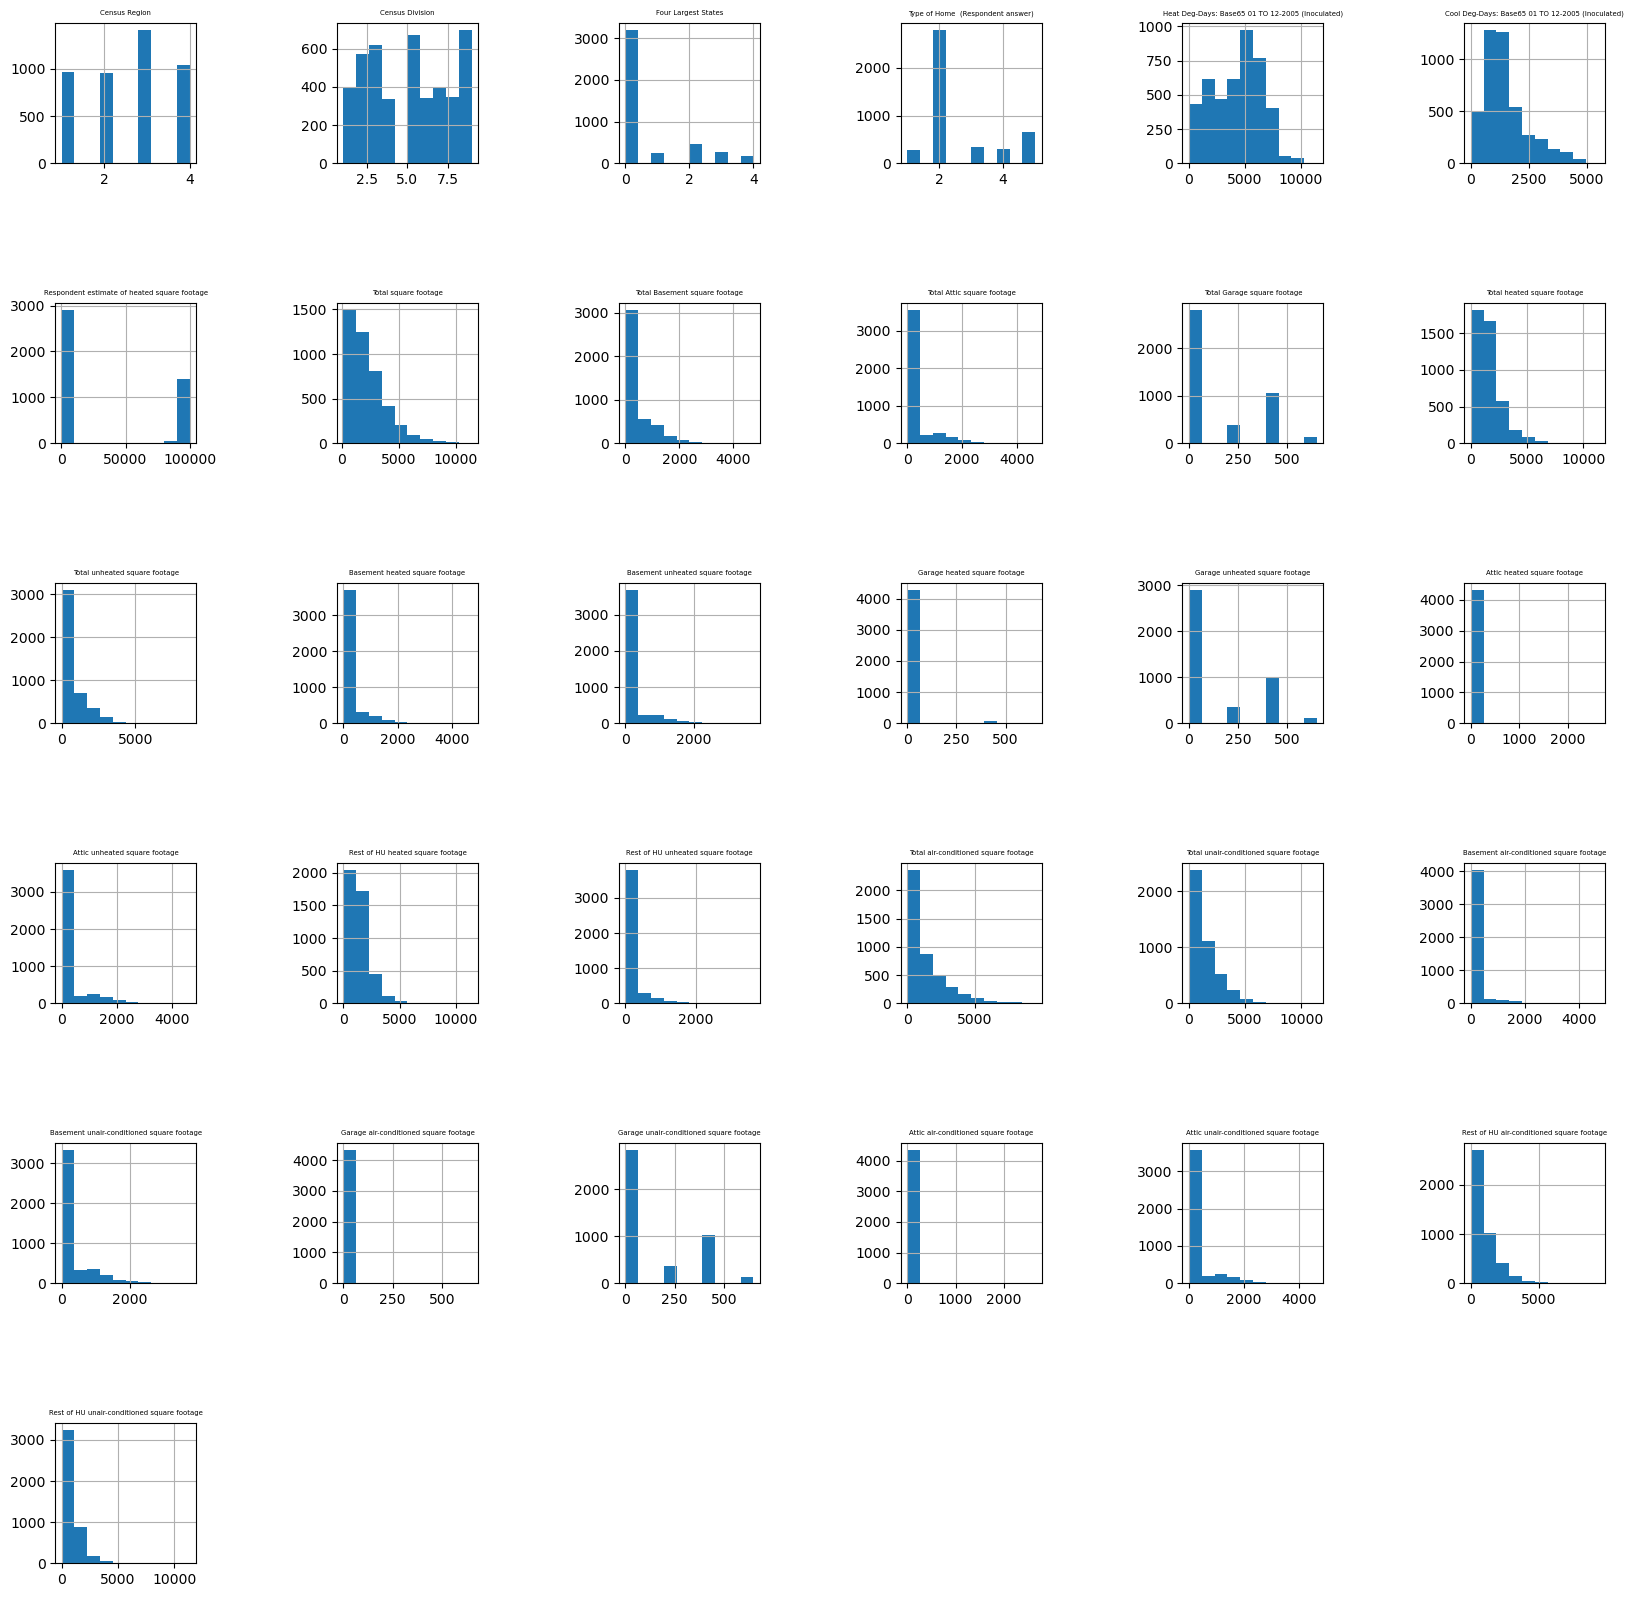

In [44]:
# Make a historgram of the independent variables
fig2 = df_indep.hist(figsize = (20,20))
plt.subplots_adjust(wspace = 1, hspace = 1)
[x.title.set_size(5) for x in fig2.ravel()]

plt.show()

Note, the square footage data appears to be repetitive. This may skew the model. Therefore, only the total square footage will be used in the analysis. 

In [46]:
columns_footage = [col for col in df.columns if 'footage' in col]
df_footage = df[columns_footage]

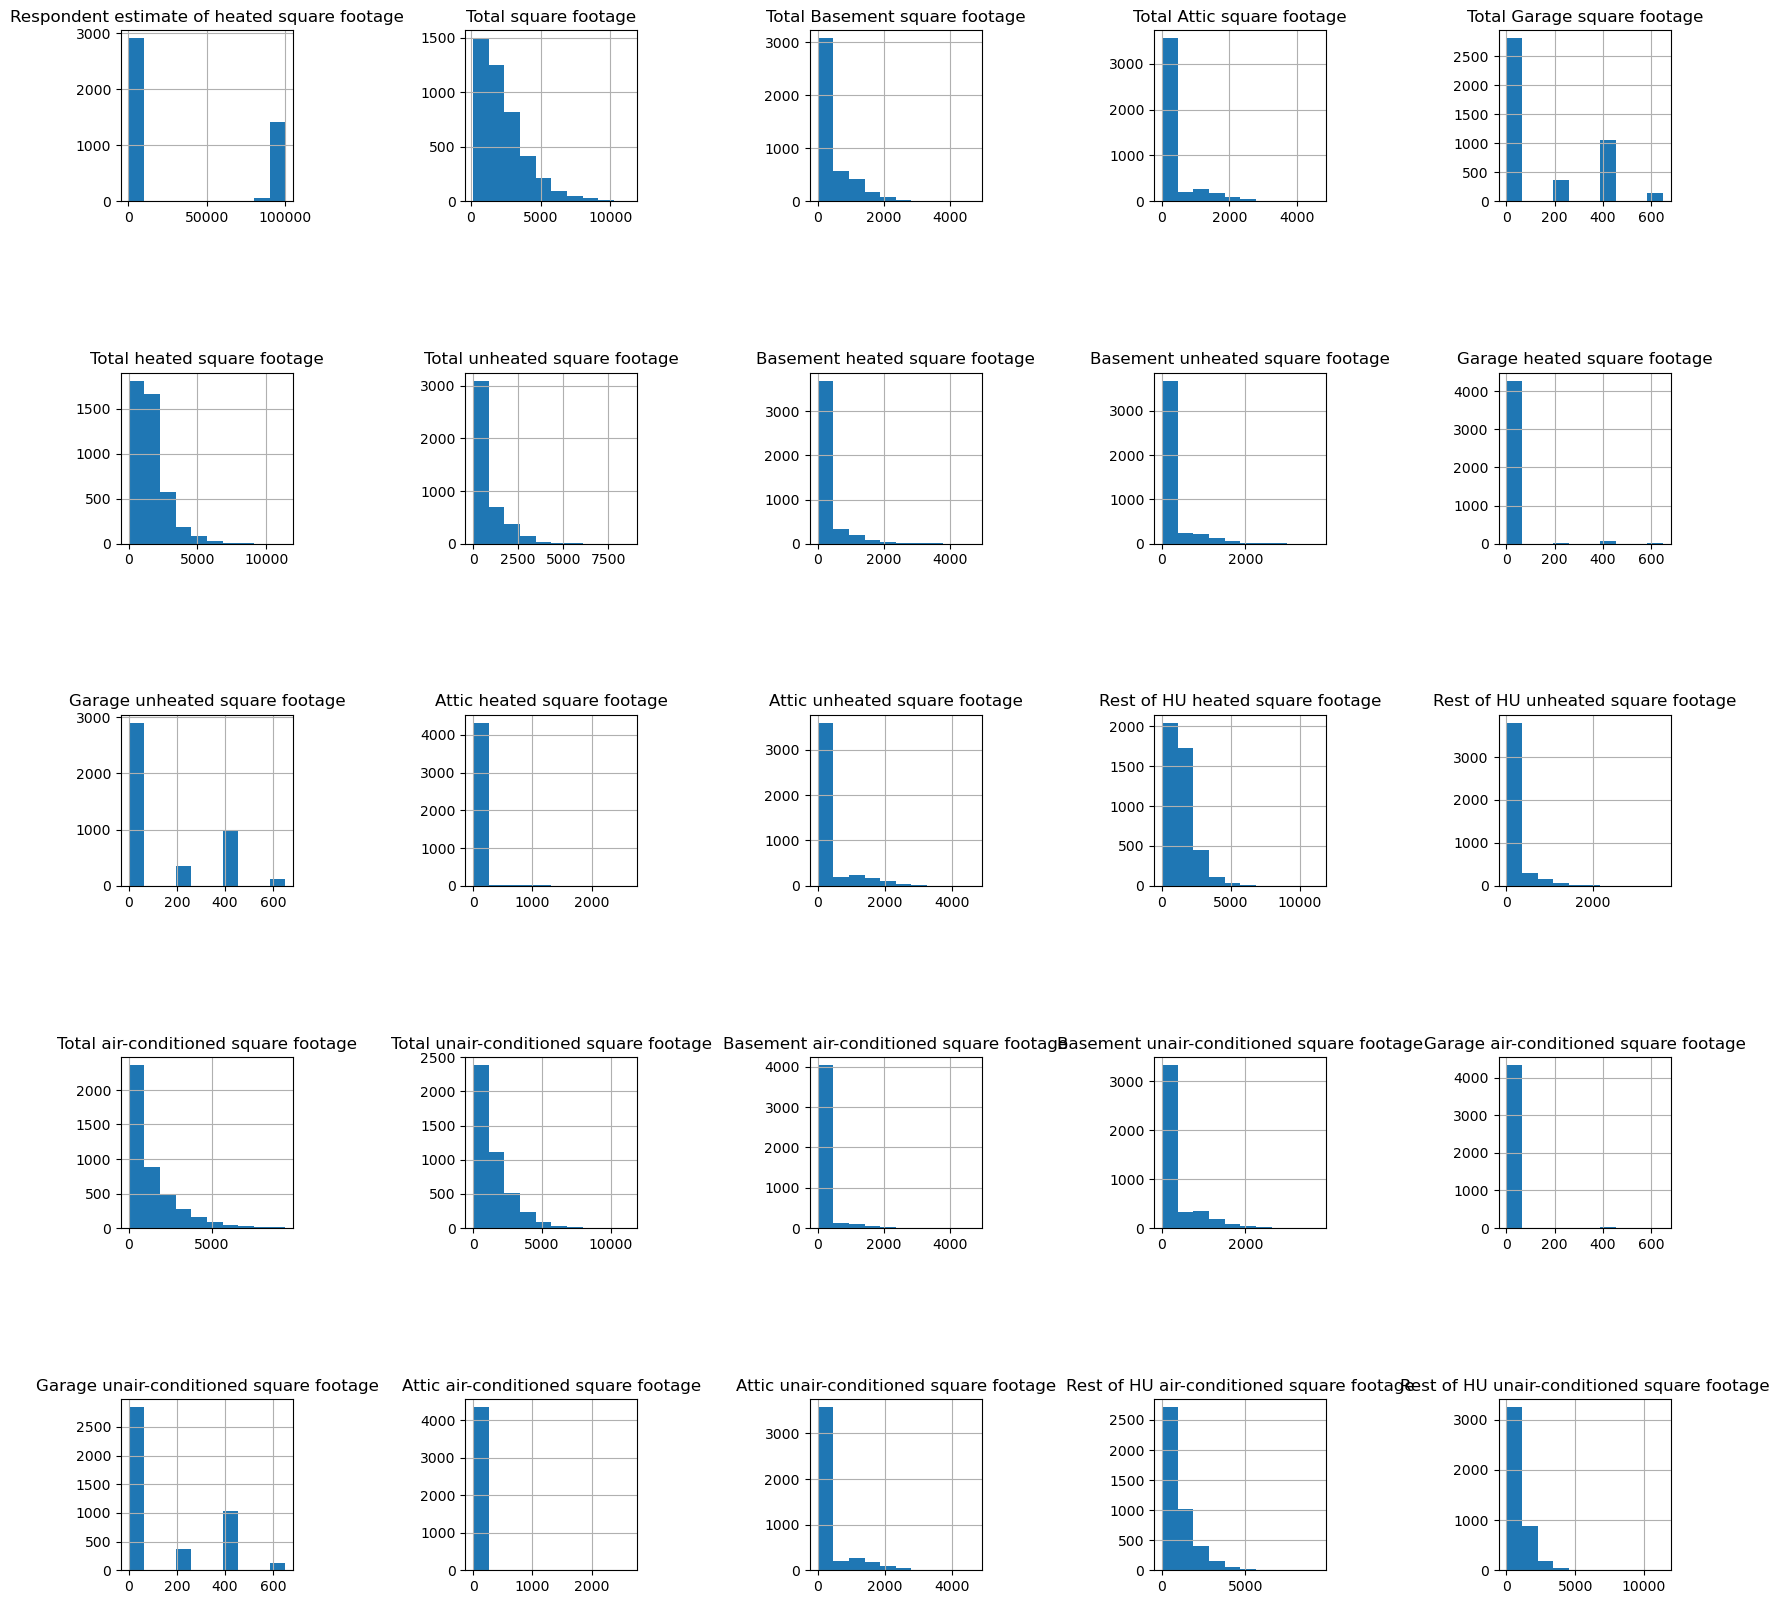

In [47]:
# Make a historgram of the independent variables
fig3 = df_footage.hist(figsize = (20,20))
plt.subplots_adjust(wspace = 1, hspace = 1)
[x.title.set_size(5) for x in fig2.ravel()]

plt.show()

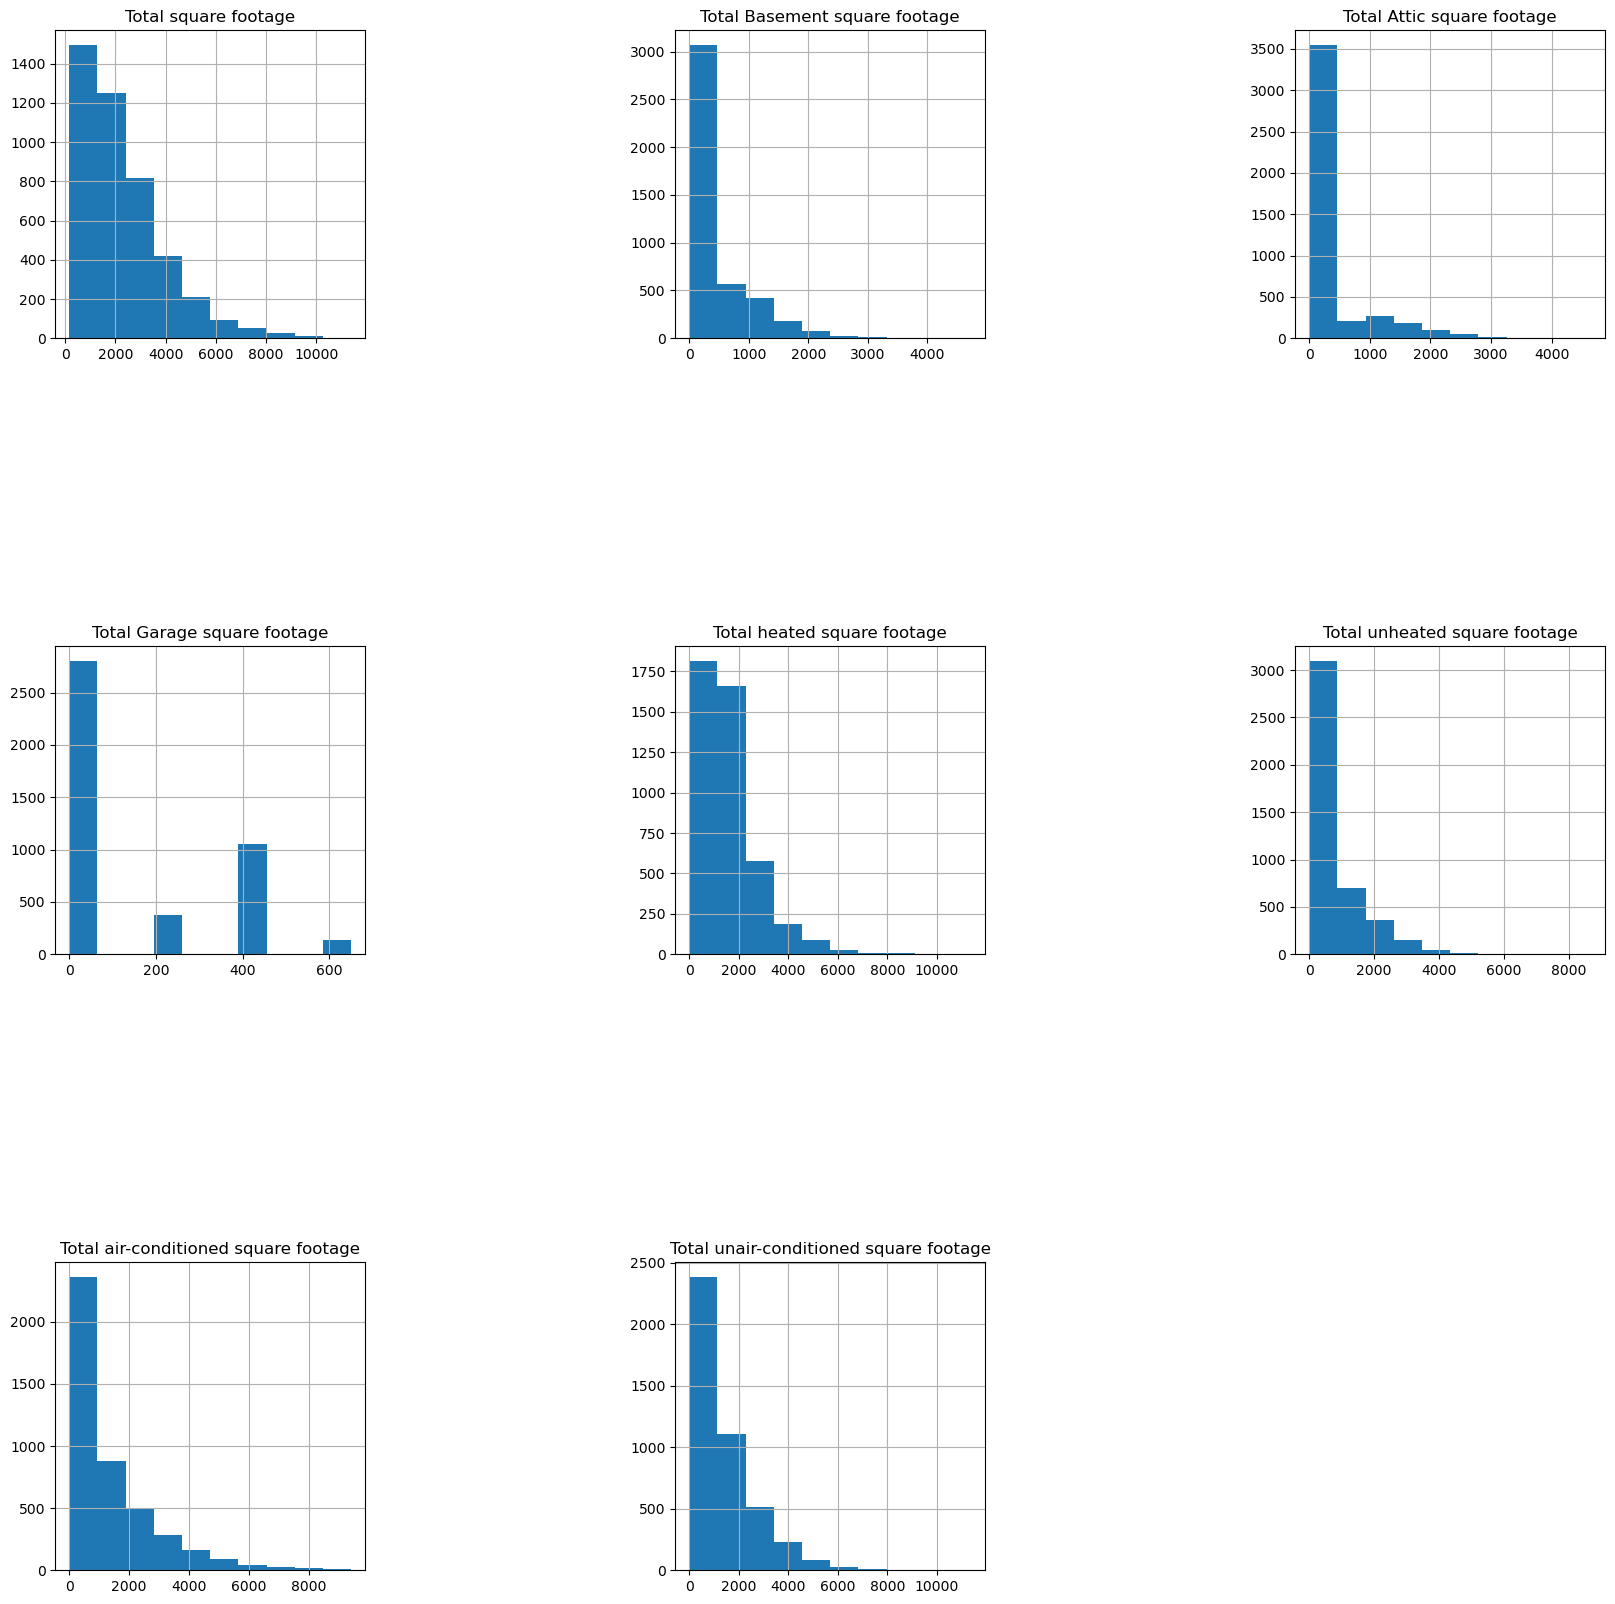

In [48]:
columns_total_footage = [col for col in df_footage.columns if 'Total' in col]
df_total_footage = df_footage[columns_total_footage]

fig4 = df_total_footage.hist(figsize = (20,20))
plt.subplots_adjust(wspace = 1, hspace = 1)
[x.title.set_size(5) for x in fig2.ravel()]

plt.show()

In [49]:
columns_footage.remove('Total square footage')

In [50]:
df = df.drop(columns = columns_footage)

## 3.1 Cleaning, Transforming, Visualizing 

Next, call the .corr() method on the data to look at all the correlations between our variables. The Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1.

In [53]:
df.corr()

,Census Region,Census Division,Four Largest States,Type of Home (Respondent answer),Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated),Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated),Kilowatt Hours Of Electricity Used,Total square footage
Census Region,1.000000,0.966177,0.292340,-0.092034,-0.566123,0.209955,0.125180,-0.114599
Census Division,0.966177,1.000000,0.341076,-0.076936,-0.586886,0.197612,0.093815,-0.131079
Four Largest States,0.292340,0.341076,1.000000,0.076096,-0.633523,0.457405,0.050528,-0.078870
Type of Home (Respondent answer),-0.092034,-0.076936,0.076096,1.000000,-0.019444,-0.002693,-0.299862,-0.386918
Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated),-0.566123,-0.586886,-0.633523,-0.019444,1.000000,-0.728440,-0.194453,0.127409
Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated),0.209955,0.197612,0.457405,-0.002693,-0.728440,1.000000,0.297658,-0.063521
Kilowatt Hours Of Electricity Used,0.125180,0.093815,0.050528,-0.299862,-0.194453,0.297658,1.000000,0.347724
Total square footage,-0.114599,-0.131079,-0.078870,-0.386918,0.127409,-0.063521,0.347724,1.000000


Look at the correlations to the dependent variable and order the correlations in order of highest to lowest. 

In [57]:
correlations = df.corr()['Kilowatt Hours Of Electricity Used']
sorted_coorelations = correlations.drop('Kilowatt Hours Of Electricity Used').sort_values(key=abs, ascending=False)
print(sorted_coorelations)

Total square footage                                0.347724
Type of Home  (Respondent answer)                  -0.299862
Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)    0.297658
Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)   -0.194453
Census Region                                       0.125180
Census Division                                     0.093815
Four Largest States                                 0.050528
Name: Kilowatt Hours Of Electricity Used, dtype: float64


Generally, appliance use has the highest correlation, followed by total airconditioned square footage and total heated square footage. 

Electricity use is negatively correlated with the type of home, heat days, and several square footage responses. 

Plot the pairwise relationships in the dataset, to check out how our variables relate to one another.

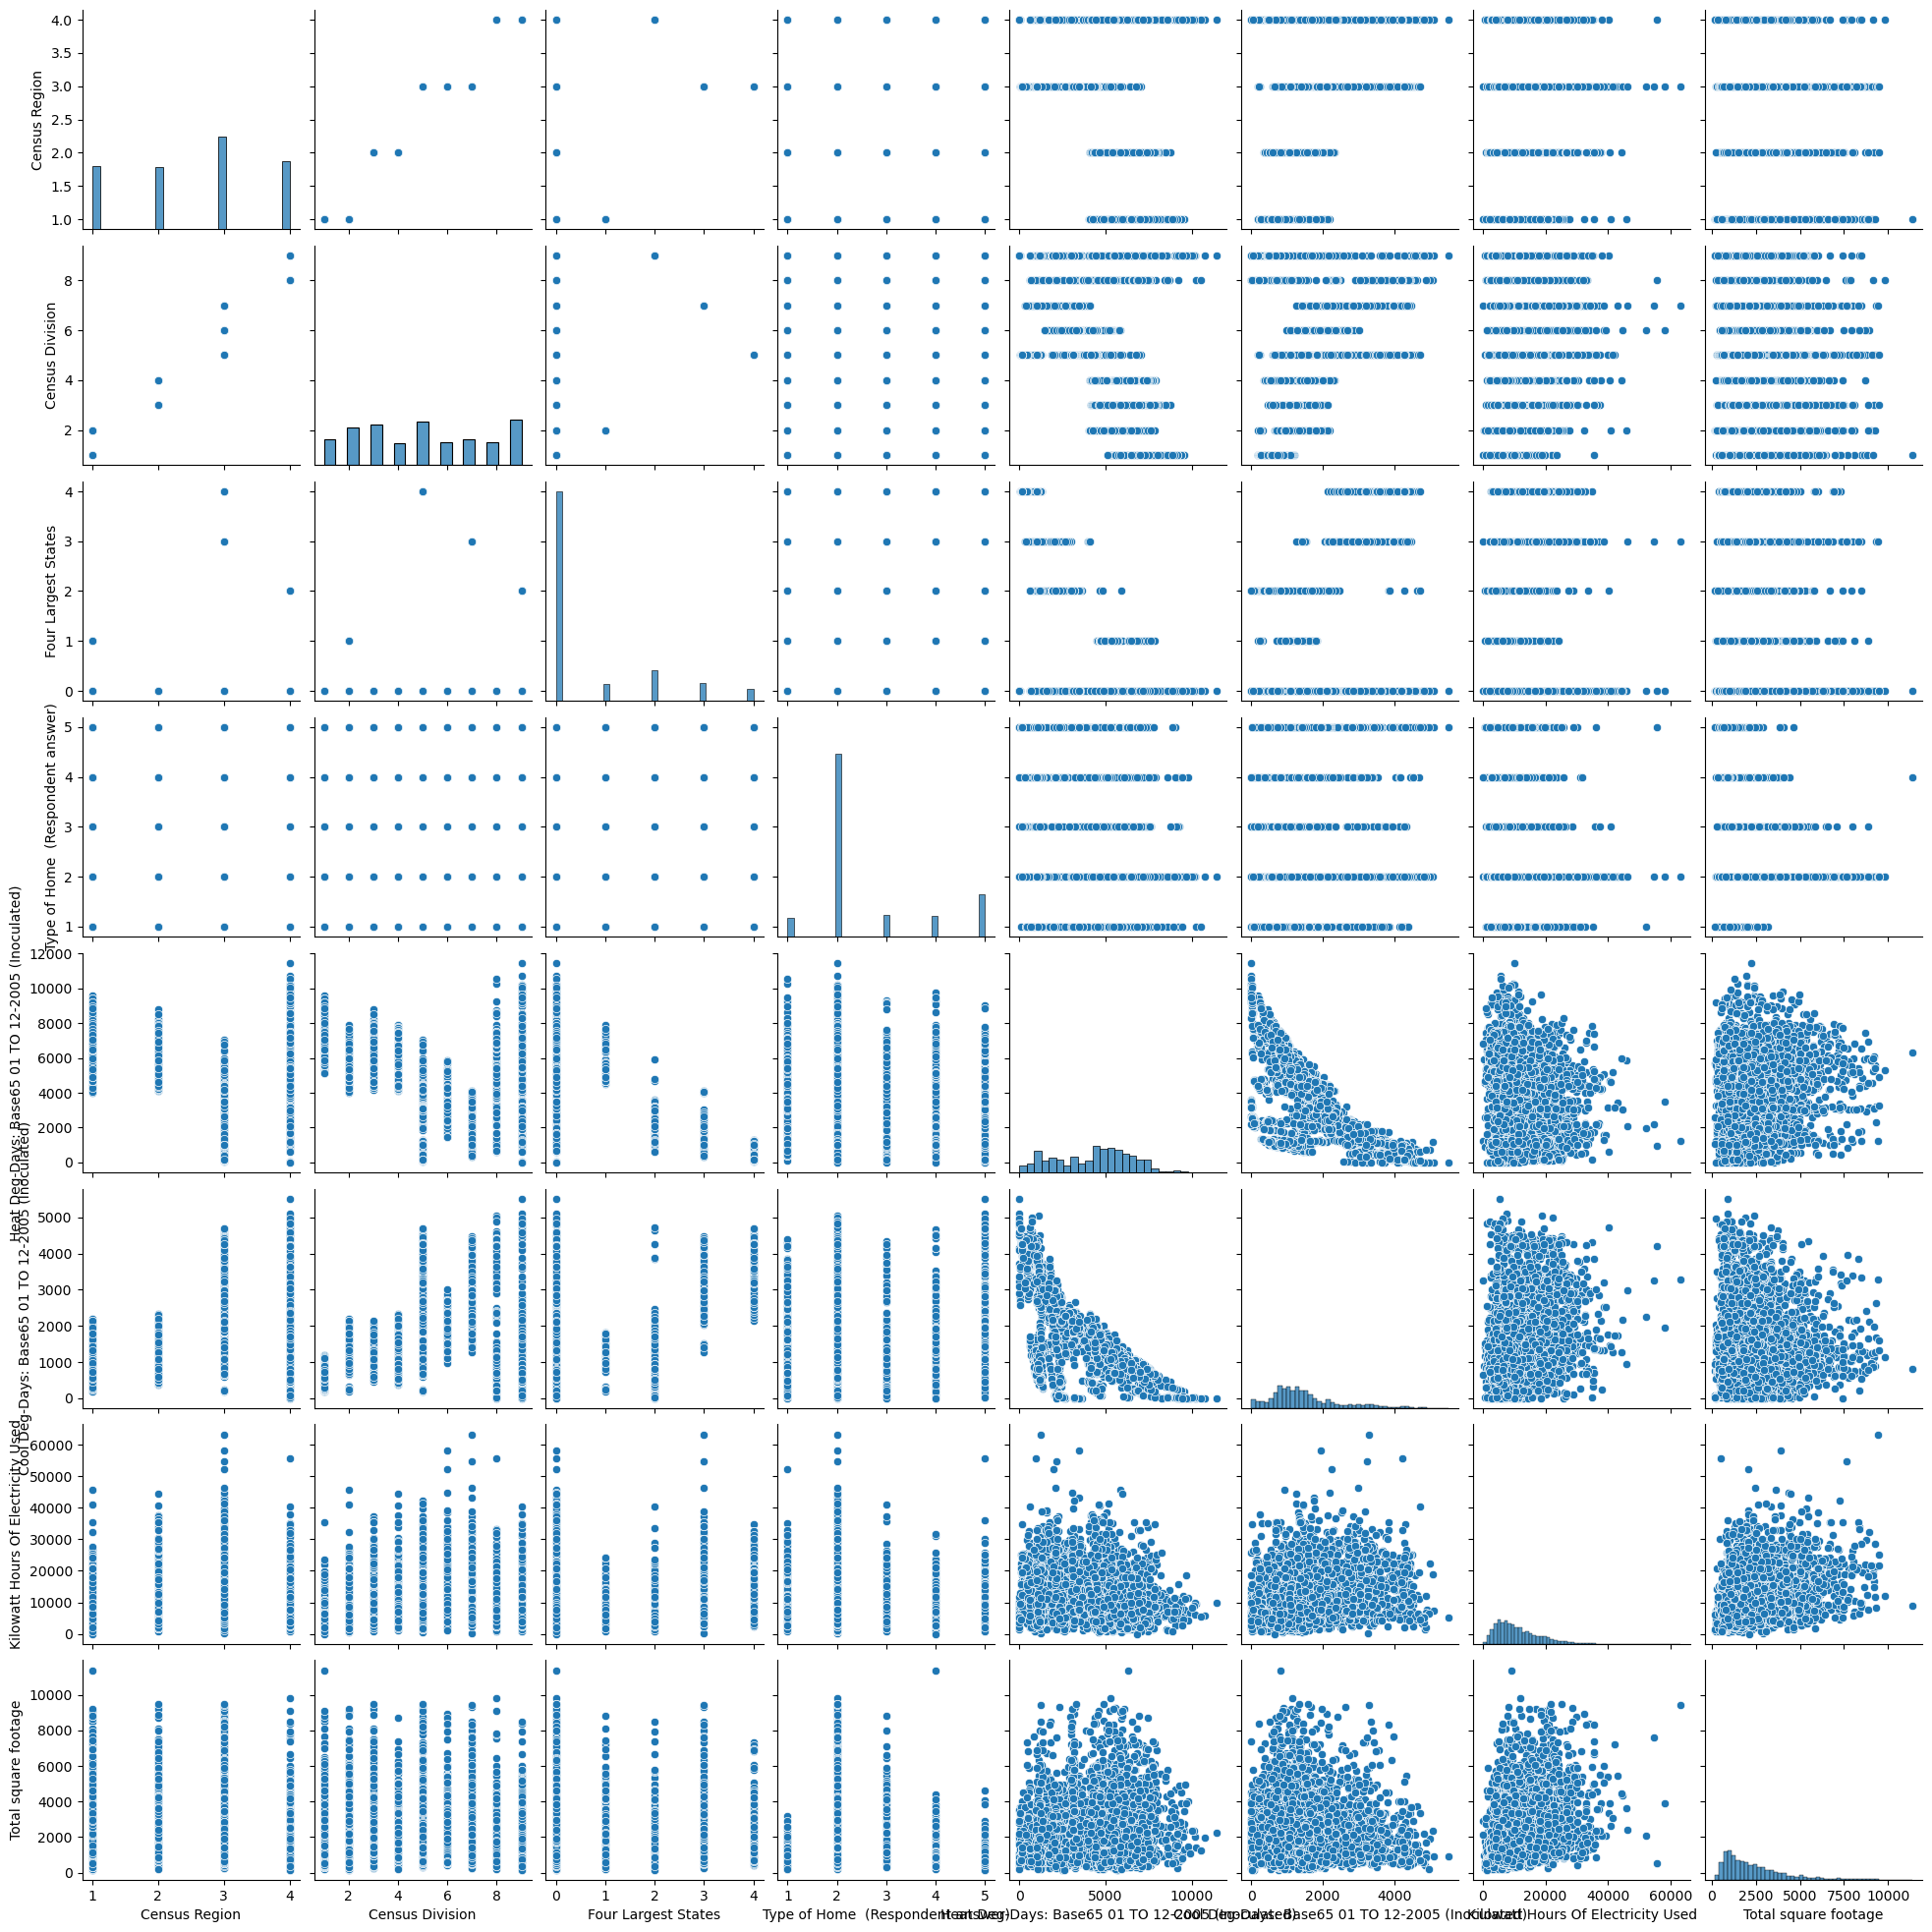

In [60]:
sns.pairplot(df)

Create a heatmap of the corr() data.

<Axes: >

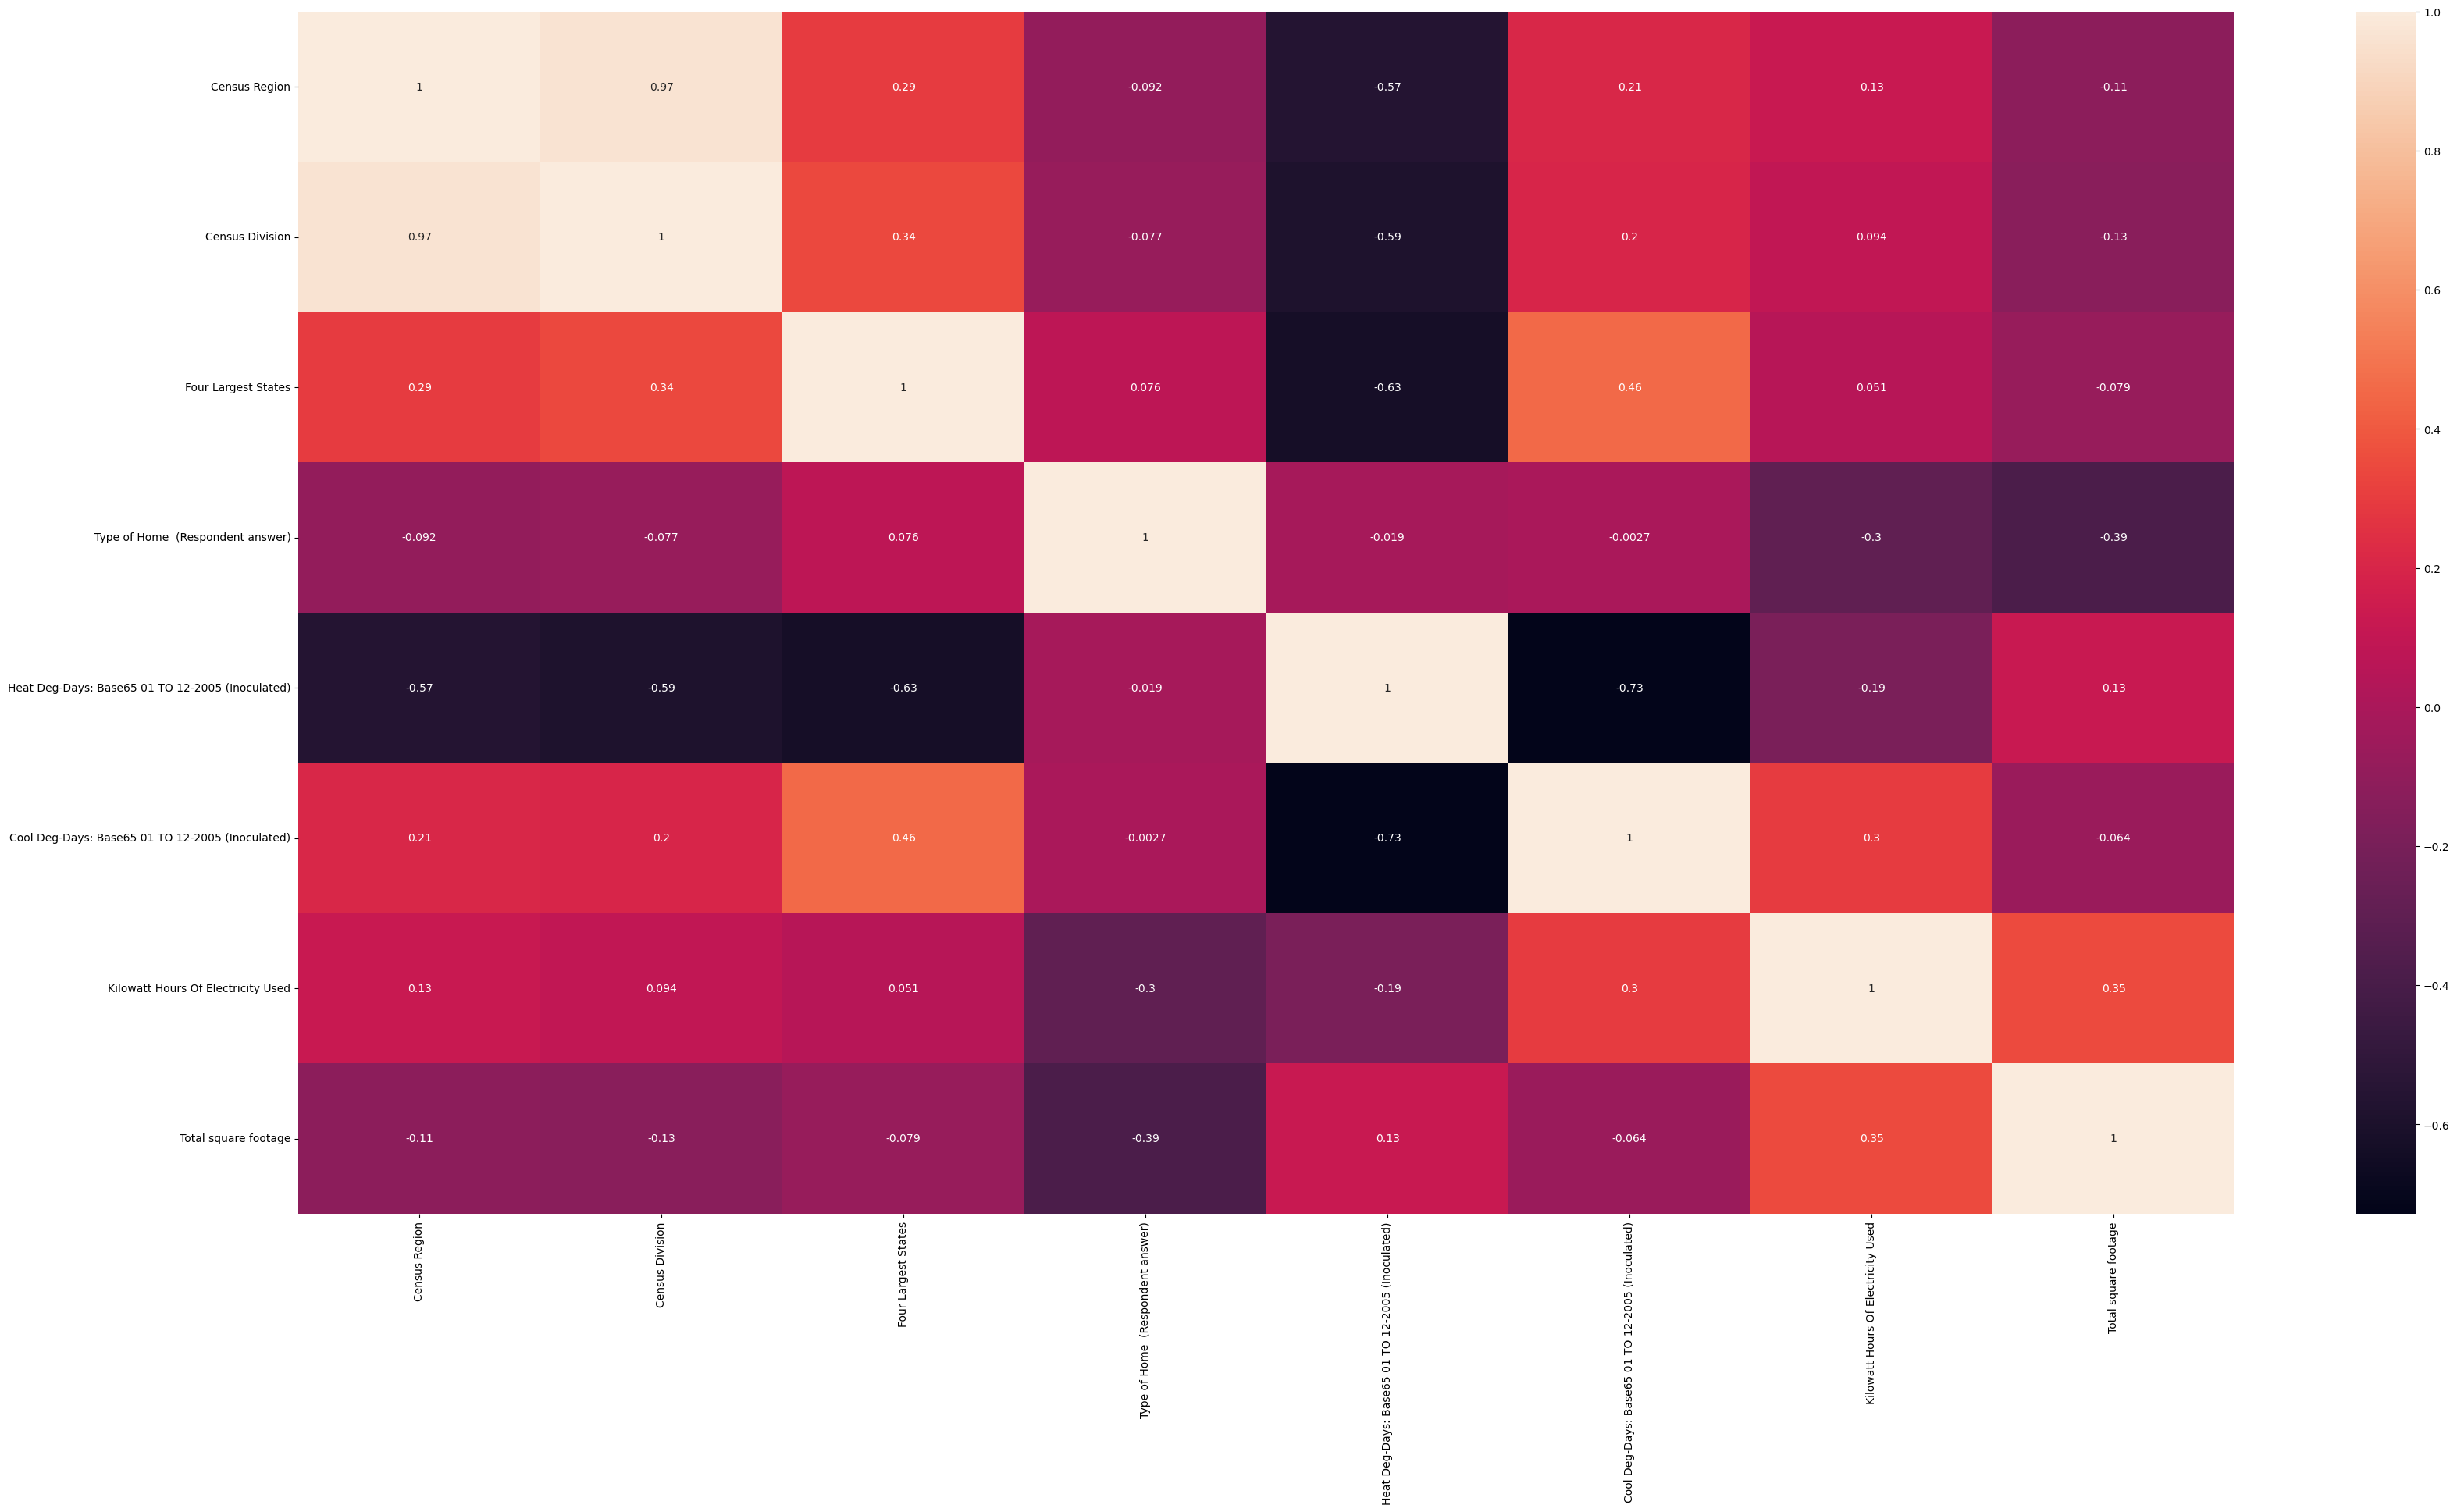

In [62]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot=True)

Note, the number of cool days and the total square footage have the highest coorelations with the electricity usage. 